In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
auto=pd.read_csv('/content/Automobile_data.csv')
auto.head(4)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950


# Preprocessing steps:

In [3]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
auto.nunique() # no of unique values in each column

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

# Replacing ? with Nan values=>

#### Why replacing with Nan, not other value?
- This is how we indicate the state missing values in numpy and pandas
- All the functions exists isna( ),dropna( ),isnull( ) related to Nan
- It doesnot change the data type, can be used in both numerical and categorical columns
Eg: For suppose ? made numerical columns(int or float) as object dtype

In [5]:
auto['normalized-losses'].replace('?',np.nan,inplace=True)

In [6]:
auto.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [7]:
auto['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

#### We have ? in horse power column also so we replace ? in the entire table with Nan

In [8]:
auto.replace('?',np.nan,inplace=True)

In [9]:
auto['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', nan, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

# Change the data type of numerical columns from object to int or float

In [10]:
# normalized-losses, bore, stroke, horsepower, peak-rpm, price
auto['horsepower']=auto['horsepower'].apply(float)
auto['price']=auto['price'].apply(float)
auto['peak-rpm']=auto['peak-rpm'].apply(float)
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Now take care of duplicates

In [11]:
auto.duplicated().sum() # no duplicate values in the auto_mobile dataset

0

In [12]:
# lets drop duplicates if any are present
auto.drop_duplicates(inplace=True)

In [13]:
# lets see any missing values are present
auto.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [14]:
auto['horsepower'].fillna(auto['horsepower'].mean(),inplace=True)
auto['price'].fillna(auto['price'].mean(),inplace =True)
auto['peak-rpm'].fillna(auto['peak-rpm'].mean(),inplace=True)

In [15]:
auto[['horsepower','price','peak-rpm']].isna().sum()

horsepower    0
price         0
peak-rpm      0
dtype: int64

In [16]:
# create a column combined milage
auto['comb_mpg']=(auto['city-mpg']+auto['highway-mpg'])/2 # average

In [17]:
auto.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,comb_mpg
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,24.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,24.0


# Exploratory Data Analysis:

# Q. How weight of veichle affecting combined milage?

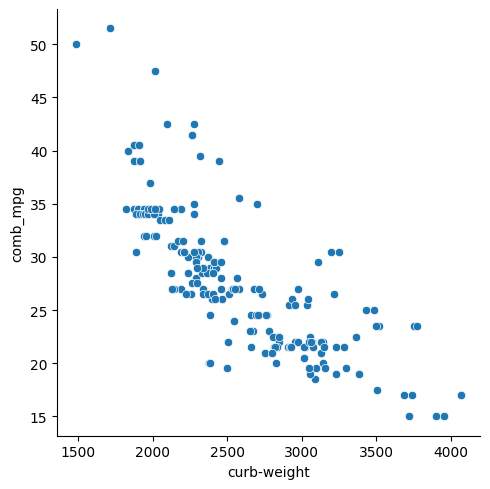

In [18]:
# scatter plot
sns.relplot(data=auto,x='curb-weight',y='comb_mpg',kind='scatter')

# Conclusion: The slope of the staraight line is negative which means as weight increases the combined milage of veichle decreases.

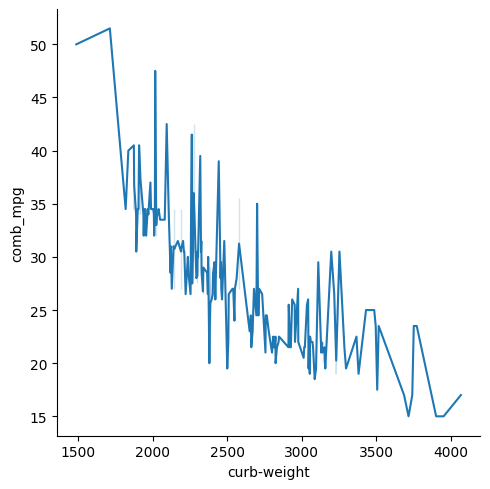

In [19]:
# line plot
sns.relplot(data=auto,x='curb-weight',y='comb_mpg',kind='line')

Q. Do the analysis for different types of veichles?

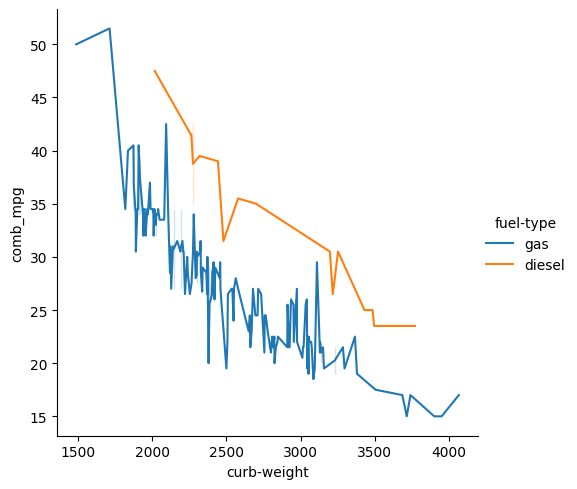

In [20]:
sns.relplot(data=auto,x='curb-weight',y='comb_mpg',kind='line',hue='fuel-type')

# Q. I want to understand the difference of power of naturally charge veichels and turbo charged veichles?

<Axes: xlabel='aspiration', ylabel='horsepower'>

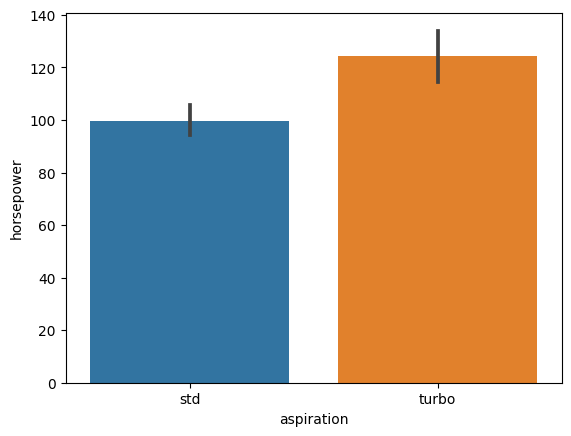

In [21]:
# bar plot
sns.barplot(data=auto,x='aspiration',y='horsepower')

### Mean power of turbo veichles is more than mean power of standard veichles

<Axes: xlabel='aspiration', ylabel='horsepower'>

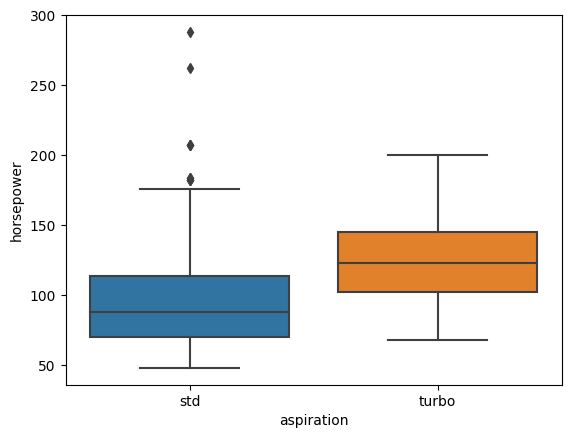

In [22]:
# box plot
sns.boxplot(data=auto,x='aspiration',y='horsepower')

# Turbo charged is more powerful than standard veichles

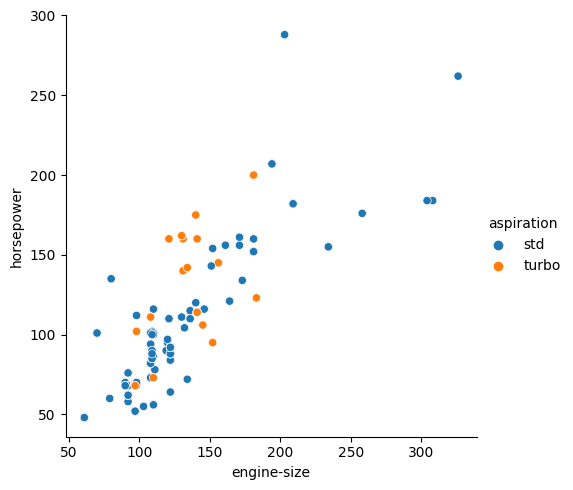

In [23]:
sns.relplot(data=auto,x='engine-size',y='horsepower',hue='aspiration',kind='scatter')

# Given the same engine-size turbo charged are more powerful than natural veichles

# Q. How does the no of cylinders affect the peak rpm?

In [24]:
auto['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [25]:
auto.groupby('num-of-cylinders')['peak-rpm'].mean()

num-of-cylinders
eight     4850.000000
five      5081.818182
four      5113.212194
six       5143.750000
three     5100.000000
twelve    5000.000000
two       6000.000000
Name: peak-rpm, dtype: float64

# Q. Location of engine in a veichle as any effect on power?

In [26]:
auto['engine-location'].unique()

array(['front', 'rear'], dtype=object)

In [27]:
auto.groupby('engine-location')['horsepower'].mean().sort_values(ascending=False)

engine-location
rear     207.000000
front    102.730259
Name: horsepower, dtype: float64

<Axes: xlabel='engine-location', ylabel='horsepower'>

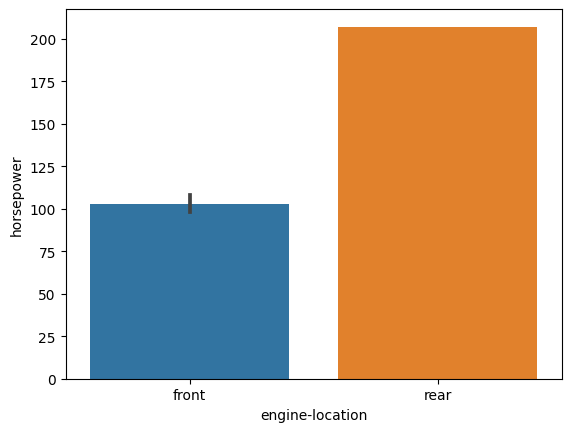

In [28]:
# barplot
sns.barplot(data=auto,x='engine-location',y='horsepower')

# Average Horse Power of rear engine veichles is much more higher than front engine veichles. To have more powerful engines, the engine location choosen to be rear.

# Q. Which body styles generally have more weight?

<Axes: xlabel='body-style', ylabel='curb-weight'>

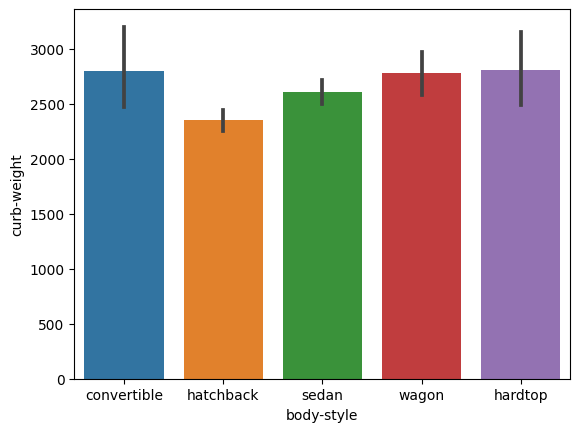

In [29]:
# barplot
sns.barplot(data=auto,x='body-style',y='curb-weight')

<Axes: xlabel='body-style', ylabel='curb-weight'>

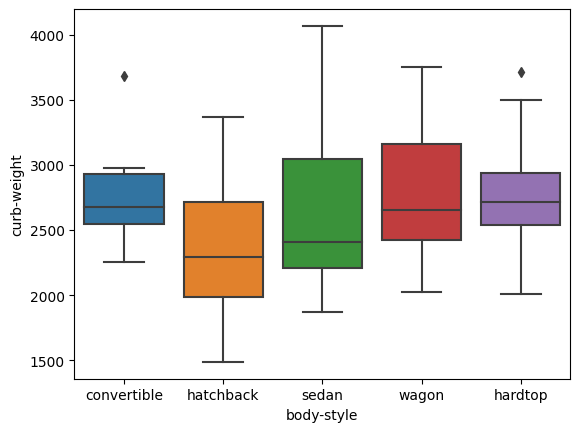

In [30]:
sns.boxplot(data=auto,x='body-style',y='curb-weight')

In [31]:
auto.groupby('body-style')['curb-weight'].mean().sort_values(ascending=False)

body-style
hardtop        2810.625000
convertible    2801.666667
wagon          2784.240000
sedan          2610.593750
hatchback      2348.185714
Name: curb-weight, dtype: float64

# There is no much more effect of body-style on weight.All have nearly similar weights.

# Q. How is the power associated with rpm based on particular fuel type?

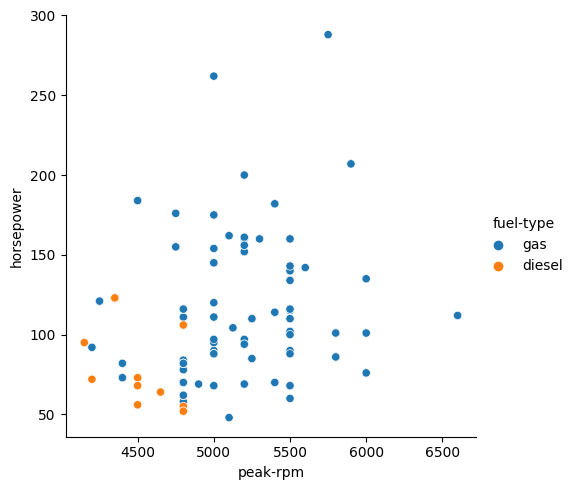

In [32]:
# scatter plot
sns.relplot(data=auto,y='horsepower',x='peak-rpm',hue='fuel-type')

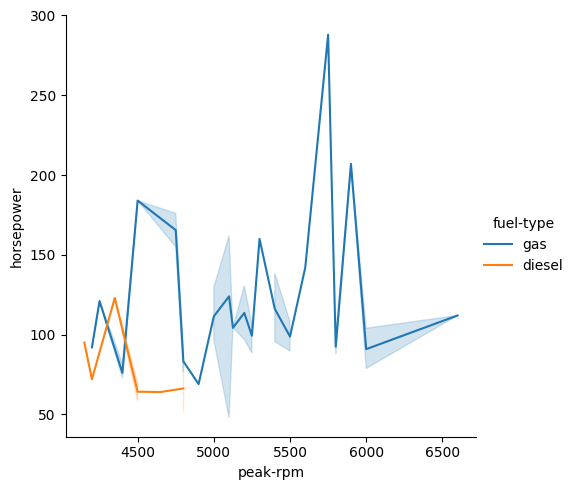

In [33]:
# line plot
sns.relplot(data=auto,y='horsepower',x='peak-rpm',hue='fuel-type',kind='line')

In [34]:
auto['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

Conclusion: As there are less no of disel veichles wrt gas veichles. We cannot conclude anything.

# Q. For the same no of cylinders do naturally aspirated veichles generated more power or turbo veichles?

<Axes: xlabel='num-of-cylinders', ylabel='horsepower'>

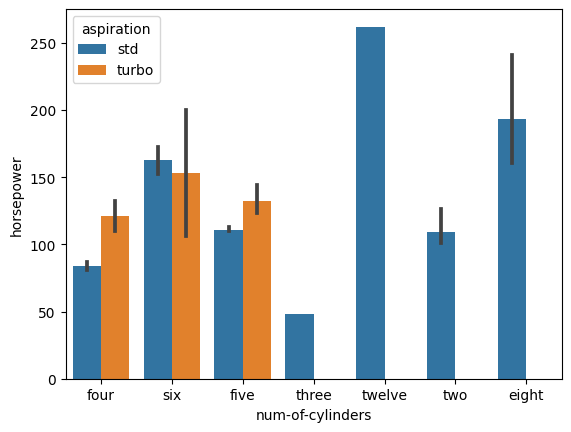

In [35]:
# bar plot => x -> num-of-cylinders, y-> horsepower
sns.barplot(data=auto,x='num-of-cylinders',y='horsepower',hue='aspiration')

Conclusion: Turbo powered veichles are more powerful than the naturally aspirated veichles for given num-of-cylinders.